In [58]:
%matplotlib inline
from delay_char import DlyLineDlog
import sys
import os
import numpy as np
import pandas as pd
import matplotlib

In [59]:
def data2df(lot_num, temp):
    dly = DlyLineDlog(os.path.join(".\\data\\Delay_line\\", lot_num, temp, "summary_" + temp + '.txt'), temp, lot_num)
    df_lst = dly.gen_df_lst()
    return  pd.DataFrame(df_lst)


In [60]:
lotnum = "RC01927M"
temp = '25C'
df = data2df(lotnum, temp)
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))
lotnum = "RC01928M"
df = df.append(data2df(lotnum, '25C'))
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))


In [61]:
df.shape

(160230, 7)

In [63]:
df.columns = ['Lot', 'Temp', 'Dev#', 'VDD', 'Test', 'Data0', 'Data1']

In [66]:
# df[(df['Test'] == 'VOH') | (df['Test'] == 'VOL')]

In [67]:
df.dtypes

Lot       object
Temp      object
Dev#       int64
VDD       object
Test      object
Data0    float64
Data1     object
dtype: object

In [68]:
df_delay = df[df['Test'] == 'Delay']

In [69]:
# df_delay["Data1"] = df_delay['Data1'].convert_objects(convert_numeric=True)

In [70]:
df_delay["Data1"] = df_delay['Data1'].astype(int)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [71]:
df_delay["Dly"] = df_delay.apply(lambda x: (x['Data0']*1000 - x['Data1']) / x['Data1'] * 100, axis=1)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


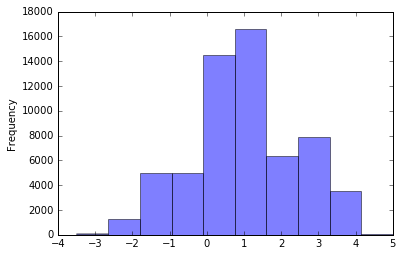

In [74]:
df_delay[df_delay['Data1'] <= 8000]['Dly'].plot(kind='hist', alpha=0.5)

In [76]:
df_delay[df_delay['Data1'] <= 8000]['Dly'].describe()

count    60270.000000
mean         1.004621
std          1.386894
min         -3.500000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: Dly, dtype: float64

In [78]:
df_delay['Dly'].argmax()

8728

In [79]:
df_delay[df_delay['Data1'] >= 8000]['Dly'].describe()

count    89670.000000
mean         0.550541
std          0.768721
min         -2.000000
25%          0.000000
50%          0.600000
75%          1.196721
max          3.000000
Name: Dly, dtype: float64

In [84]:
df_delay.loc[df_delay[df_delay['Data1'] >= 8000]['Dly'].argmax()]

,Lot,Temp,Dev#,VDD,Test,Data0,Data1,Dly
9127,RC01927M,25C,9,3.0,Delay,8.04,8000,0.5
9127,RC01927M,105C,10,3.0,Delay,8.08,8000,1.0
9127,RC01927M,-5C,11,3.0,Delay,8.08,8000,1.0
9127,RC01928M,25C,9,3.0,Delay,8.20,8000,2.5
9127,RC01928M,105C,9,3.0,Delay,8.24,8000,3.0
9127,RC01928M,-5C,9,3.0,Delay,8.20,8000,2.5


In [87]:
df_delay = df_delay[(df_delay['Dev#'] != 9) | (df_delay['Lot'] != 'RC01928M')]

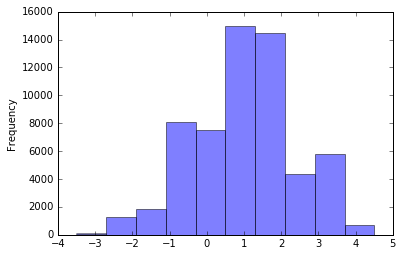

In [91]:
df_delay[df_delay['Data1'] <= 8000]['Dly'].plot(kind='hist', alpha=0.5)

In [92]:
df_delay[df_delay['Data1'] <= 4000]['Dly'].describe()

count    30240.000000
mean         1.483003
std          1.421866
min         -3.000000
25%          0.500000
50%          1.500000
75%          2.500000
max          4.500000
Name: Dly, dtype: float64

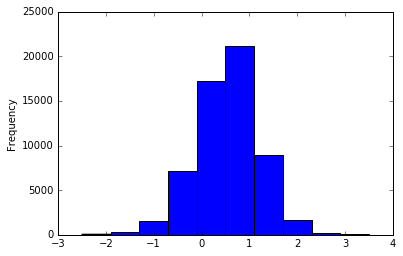

In [29]:
df_delay[df_delay['Data1'] >= 4000]['Delay_percent'].plot(kind='hist')

In [45]:
df_delay[df_delay['Data1'] >= 4000]['Delay_percent'].describe()

count    58320.000000
mean         0.537532
std          0.678554
min         -2.500000
25%          0.000000
50%          0.500000
75%          1.000000
max          3.500000
Name: Delay_percent, dtype: float64

In [57]:
df_delay[(df_delay["LOT_Num"] == 'RC01928M') &]

,LOT_Num,Temp,Dev#,VDD,Test,Data0,Data1,Delay_percent
3270,RC01927M,25C,4,3.7,Delay,2.0200,2000,1.00000
3271,RC01927M,25C,4,3.6,Delay,2.0200,2000,1.00000
3272,RC01927M,25C,4,3.5,Delay,2.0200,2000,1.00000
3273,RC01927M,25C,4,3.4,Delay,2.0200,2000,1.00000
3274,RC01927M,25C,4,3.3,Delay,2.0200,2000,1.00000
3275,RC01927M,25C,4,3.2,Delay,2.0200,2000,1.00000
3276,RC01927M,25C,4,3.1,Delay,2.0200,2000,1.00000
3277,RC01927M,25C,4,3.0,Delay,2.0400,2000,2.00000
3278,RC01927M,25C,4,2.9,Delay,2.0300,2000,1.50000
3279,RC01927M,25C,4,2.8,Delay,2.0500,2000,2.50000


In [53]:
df_delay

,LOT_Num,Temp,Dev#,VDD,Test,Data0,Data1,Delay_percent
0,RC01927M,25C,1,3.7,Delay,1.9900,2000,-0.50000
1,RC01927M,25C,1,3.6,Delay,1.9900,2000,-0.50000
2,RC01927M,25C,1,3.5,Delay,1.9900,2000,-0.50000
3,RC01927M,25C,1,3.4,Delay,1.9900,2000,-0.50000
4,RC01927M,25C,1,3.3,Delay,1.9900,2000,-0.50000
5,RC01927M,25C,1,3.2,Delay,1.9900,2000,-0.50000
6,RC01927M,25C,1,3.1,Delay,1.9900,2000,-0.50000
7,RC01927M,25C,1,3.0,Delay,1.9900,2000,-0.50000
8,RC01927M,25C,1,2.9,Delay,1.9900,2000,-0.50000
9,RC01927M,25C,1,2.8,Delay,1.9900,2000,-0.50000
